In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from bs4 import BeautifulSoup
import requests

# Some basic analysis of the historical data

In [282]:
ign = pd.read_csv('game/ign.csv')
sales = pd.read_csv('game/Video_Games_Sales_as_at_22_Dec_2016.csv')

## What is the transition pattern across different generations of consoles?

Text(0,0.5,'Game released')

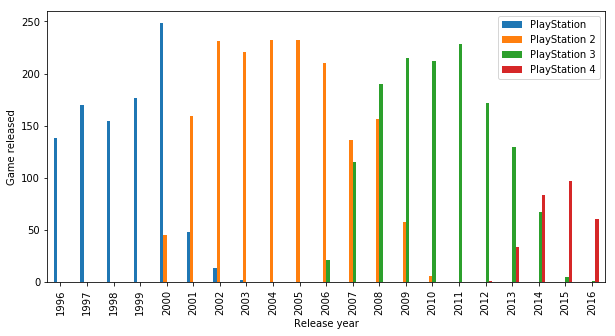

In [358]:
ps = ign.loc[(ign.platform == 'PlayStation'),'release_year'].value_counts().sort_index()
ps.name = 'PlayStation'
ps2 = ign.loc[(ign.platform == 'PlayStation 2'),'release_year'].value_counts().sort_index()
ps2.name = 'PlayStation 2'
ps3 = ign.loc[(ign.platform == 'PlayStation 3'),'release_year'].value_counts().sort_index()
ps3.name = 'PlayStation 3'
ps4 = ign.loc[(ign.platform == 'PlayStation 4'),'release_year'].value_counts().sort_index()
ps4.name = 'PlayStation 4'
combined = pd.concat([ps,ps2,ps3, ps4],axis = 1)
ax = combined.plot(kind = 'bar',figsize=(10,5))
ax.set_xlabel('Release year')
ax.set_ylabel('Game released')

Text(0,0.5,'Game released')

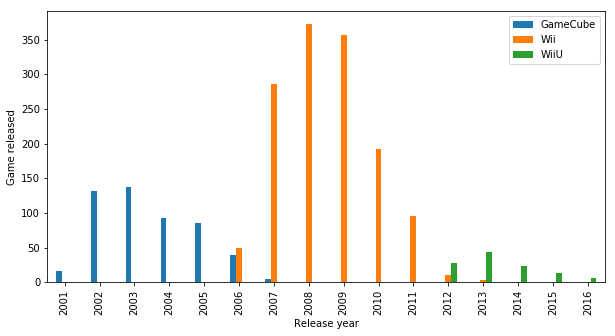

In [362]:
GameCube = ign.loc[(ign.platform == 'GameCube'),'release_year'].value_counts().sort_index()
GameCube.name = 'GameCube'
Wii = ign.loc[(ign.platform == 'Wii'),'release_year'].value_counts().sort_index()
Wii.name = 'Wii'
WiiU = ign.loc[(ign.platform == 'Wii U'),'release_year'].value_counts().sort_index()
WiiU.name = 'WiiU'
combined = pd.concat([GameCube, Wii, WiiU],axis = 1)
ax = combined.plot(kind = 'bar',figsize=(10,5))
ax.set_xlabel('Release year')
ax.set_ylabel('Game released')

### There are two differences between Sony and Nintendo in patterns if we compare the transition between different generations of consoles:
1.  Sony has longer transition period while Nintendo stop suppporting the older generation soon after the new one comes out.
2. The number of games are relatively even across different generation while Nintendo has much more games released in Wii than its other two generations of consoles.

## How many games are released in different platforms?

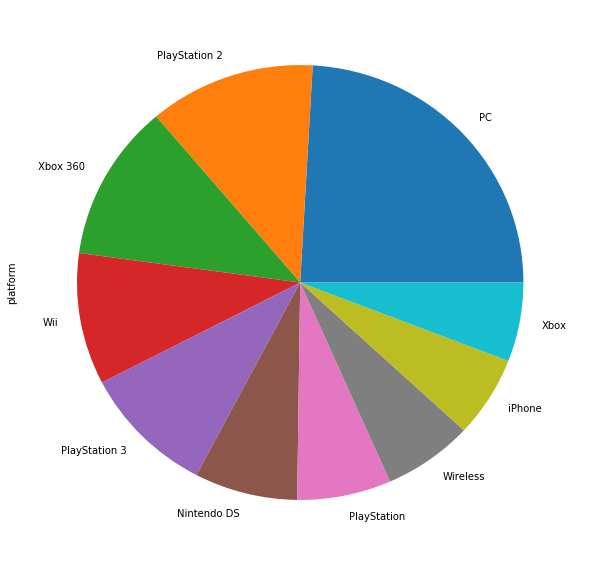

In [196]:
ign.platform.value_counts()[:10].plot.pie(figsize=(10,10))

## How do the release year and month influence the number of games released?

Text(0,0.5,'Games released')

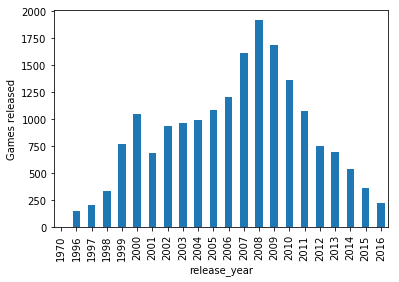

In [368]:
ax = ign.groupby('release_year').size().plot(kind = 'bar')
ax.set_ylabel('Games released')

2008 is the golden year of games.

Text(0,0.5,'Games released')

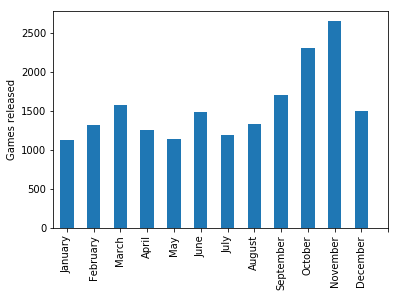

In [367]:
ax = ign.release_month.value_counts().sort_index().plot(kind = 'bar')

tick = plt.xticks(range(0,13),['January','February','March','April','May','June', \
                               'July','August','September','October','November','December'])
ax.set_ylabel('Games released')

Fall season releases the most games. The game producers like releasing games around Thanksgiving and Christmas shopping season. 

## How do different types of game's sales change over time?

In [283]:
genre_most_favorite = list(sales.groupby(['Genre'])['Global_Sales'].sum().sort_values(ascending = False)[:7].index)

sales_genre_year = sales.groupby(['Genre','Year_of_Release'])['Global_Sales'].sum()

sales_genre_year = sales_genre_year.reset_index().set_index('Year_of_Release')

Text(0,0.5,'Games released')

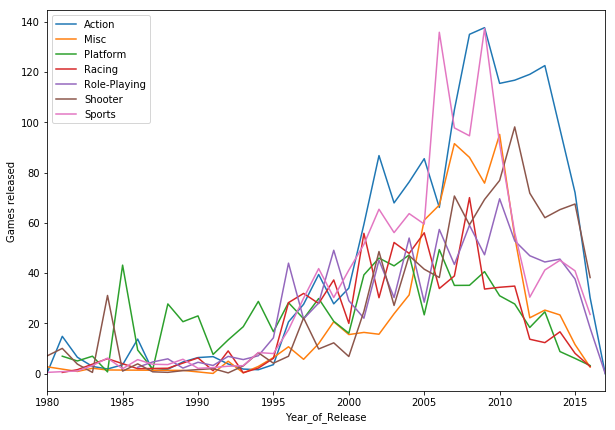

In [369]:
fig, ax = plt.subplots(figsize=(10,7))

for label, df in sales_genre_year.groupby('Genre'):
    if label in genre_most_favorite:
        df.Global_Sales.plot(ax=ax, label=label,legend=True)

plt.legend()
ax.set_ylabel('Games released')

While there are slight differents between differetn genre, the general trend is similar.

## Statistics of Mario games in the past.

In [186]:
mario_game = sales.loc[sales.Name.str.lower().str.contains('mario') == True,:].copy()

The pearson correlation between the NA sales and JP sales is 0.8621066002121125


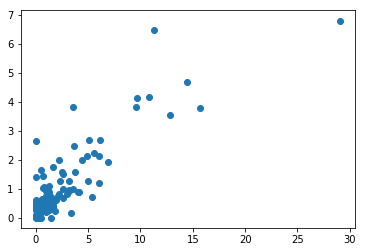

In [188]:
plt.scatter(mario_game.NA_Sales, mario_game.JP_Sales)
print('The pearson correlation between the NA sales and JP sales is {}' \
      .format(pearsonr(mario_game.NA_Sales, mario_game.JP_Sales)[0]))

The pearson correlation between the NA sales and EU sales is 0.7526435197768117


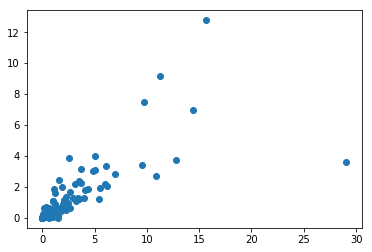

In [189]:
plt.scatter(mario_game.NA_Sales, mario_game.EU_Sales)
print('The pearson correlation between the NA sales and EU sales is {}' \
      .format(pearsonr(mario_game.NA_Sales, mario_game.EU_Sales)[0]))

There is strong correlation in sales between different regions.

In [190]:
mario_game.dropna(subset = ['Year_of_Release'], inplace = True)
mario_game.Year_of_Release = mario_game.Year_of_Release.astype('int')

Text(0,0.5,'Games released')

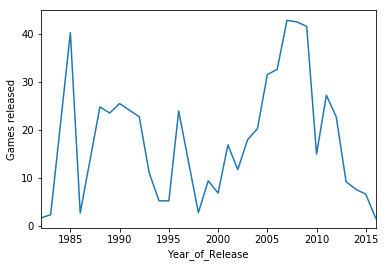

In [370]:
ax = mario_game.groupby('Year_of_Release')['Global_Sales'].sum().plot()
ax.set_ylabel('Games released')

There are two peaks in games release for Mario games. One around 1990 and the other around 2008.

# Twitter sentiment analysis of Super Mario Odyssey

Study the time series of sentimental index of a specific game.

In [1]:
import tweepy as tw

In [2]:
# Gettting access to the twitter API
tokens = []

# Order: Access Token, Access Token Secret, Consumer Key, Consumer SecretAccess

with open("twitter.cred", 'r') as fin:
    for line in fin:
        if line[0] != '#': # Not a comment line
            tokens.append(line.rstrip('\n'))

auth = tw.OAuthHandler(tokens[2], tokens[3])

auth.set_access_token(tokens[0], tokens[1])

api = tw.API(auth)

user = api.me()

print("Twitter Screen Name: ", user.screen_name)

Twitter Screen Name:  yuyang_lao


In [3]:
# input the game we want to study.
term ='#MarioOdyssey'

## take a peak at the tweets about the game

In [4]:
num_tweets = 5

for tweet in tw.Cursor(api.search, q=term, lang = 'en').items(num_tweets):
    # Process a single status
    #print("Tweet ID:", tweet.id)
    print('Tweeted by ', tweet.user.screen_name)
    print("Created at ",tweet.created_at)
    #print("Location: ",tweet.source)
    print('Tweet Text: ', tweet.text)
    print('-------------------------')

Tweeted by  AdultNep789
Created at  2017-11-12 00:07:09
Tweet Text:  RT @Protomario: That was a really great video about #MarioOdyssey #GameTheory really did great, congrats MatPat

Wait... whats that loyal t…
-------------------------
Tweeted by  enson8502
Created at  2017-11-12 00:05:16
Tweet Text:  I'm just so happy this girl is making her comeback 👍 #mayorpauline #pauline #mayor #marioodyssey… https://t.co/fvYVnTdbDD
-------------------------
Tweeted by  Frozencat3030_
Created at  2017-11-12 00:05:00
Tweet Text:  RT @PrettypastelMel: Peach outfit #4 👒

I'm drawing a series of peach’s outfits from #MarioOdyssey !
#FanArtFriday https://t.co/Mr4KdDOjqV
-------------------------
Tweeted by  Frozencat3030_
Created at  2017-11-12 00:04:56
Tweet Text:  RT @PrettypastelMel: Peach outfit #3 👙🕶️

I'm drawing a series of peach’s outfits from #MarioOdyssey ! https://t.co/D07sUHapPy
-------------------------
Tweeted by  Protomario
Created at  2017-11-12 00:04:16
Tweet Text:  That was a really g

## Train a basic Naive Bayes model to perform sentiment analysis

In [379]:
# Here we use the nltk twitter data to train the model
import numpy as np
import nltk

tws = nltk.corpus.twitter_samples

pos_tweets = np.array(tws.strings('positive_tweets.json'))
neg_tweets = np.array(tws.strings('negative_tweets.json'))

pos_labels = np.ones(pos_tweets.shape[0])
neg_labels = np.zeros(neg_tweets.shape[0])

targets = np.concatenate((pos_labels, neg_labels), axis=0)
data = np.concatenate((pos_tweets, neg_tweets), axis = 0)

print('{0} Positive Tweets'.format(pos_tweets.shape[0]))
print('{0} Negative Tweets'.format(neg_tweets.shape[0]))

5000 Positive Tweets
5000 Negative Tweets


In [381]:
# Split the data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    data, targets, test_size=0.25, random_state=23)

In [320]:
# model training
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics

tools = [('cv', CountVectorizer()), ('nb', MultinomialNB())]
pclf = Pipeline(tools)


# Lowercase, English Stop Words, and unigrams and bigrams.
pclf.set_params(cv__stop_words = 'english', \
                cv__ngram_range=(1,2), \
                cv__lowercase=True)

pclf.fit(x_train, y_train)
y_pred = pclf.predict(x_test)
print(metrics.classification_report(y_test, y_pred, target_names = ['Positive', 'Negative']))

             precision    recall  f1-score   support

   Positive       0.73      0.79      0.76      1240
   Negative       0.78      0.71      0.74      1260

avg / total       0.75      0.75      0.75      2500



## classifying new tweets

In [384]:
term ='#MarioOdyssey'
num_tweets = 100
newtweets = tw.Cursor(api.search, q=term, lang = 'en').items(num_tweets)

In [385]:
messages = []

for tweet in newtweets:
    messages.append(tweet.text)
    
new_tweets = np.array(messages)
new_pred = pclf.predict(new_tweets)

new_pos = new_tweets[new_pred == 1]
new_neg = new_tweets[new_pred == 0]

In [386]:
tweet_idx = 3

print('{0} tweets to classify.'.format(new_tweets.shape[0]))
print('{0} tweets classified as positive.'.format(new_pos.shape[0]))
print('{0} tweets classified as negative.'.format(new_neg.shape[0]))

print(75*'-')
print('Sample Positve Tweet:')
print(75*'-')
print(new_pos[tweet_idx])

print(75*'-')
print('Sample Negatve Tweet:')
print(75*'-')
print(new_neg[tweet_idx])

100 tweets to classify.
88 tweets classified as positive.
12 tweets classified as negative.
---------------------------------------------------------------------------
Sample Positve Tweet:
---------------------------------------------------------------------------
I love this game. #MarioOdyssey https://t.co/SljUalthRg
---------------------------------------------------------------------------
Sample Negatve Tweet:
---------------------------------------------------------------------------
RT @AyalaDeer: You can play fetch with a shiba inu in a cowboy hat in #MarioOdyssey #NintendoSwitch https://t.co/IARTaLklpH


# Scaping Twitch to fetch the viewer data

In [13]:
url='https://www.twitch.tv/directory'
html=requests.get(url).content
soup=BeautifulSoup(html,'lxml')

----
Note: Twitch uses a javascript to generate the viewer number dynamically. So the information is not stored in the HTML. Need to figure out a different way to scape the information.

# IGN gaming scores

In [3]:
url='http://www.ign.com/'
html=requests.get(url).content
soup=BeautifulSoup(html,'lxml')

In [4]:
# find the part for score of games
div=soup.find_all('div',{'class':"games"})
divr=div[0]
name=[]
rating=[]
# number 1 game has a different class
games=divr.find_all('div',{'class':'column-game'})
for game in games:
    name.append(game.find('a',{'class':'game-title'}).contents[0].strip())
    rating.append(game.find('a',{'class':'rating'}).contents[0].strip())

In [5]:
print('{0:55s}:{1:s}'.format('game','rating'))
print('-'*70)
for gamename,gameranking in zip(name,rating):
    print('{0:55s}:{1:s}'.format(gamename,gameranking))
    print('-'*70)

game                                                   :rating
----------------------------------------------------------------------
Super Mario Odyssey                                    :10
----------------------------------------------------------------------
Wolfenstein 2: The New Colossus                        :9.1
----------------------------------------------------------------------
Assassin's Creed Origins                               :9
----------------------------------------------------------------------
Xbox One X                                             :9
----------------------------------------------------------------------
Horizon: Zero Dawn -- The Frozen Wilds                 :8.8
----------------------------------------------------------------------
Doom                                                   :8.5
----------------------------------------------------------------------
Hand of Fate 2                                         :8
---------------------------

# IGN Review
Web scaping review articles from IGN website. Store the review of different types of good games and bad games of the past as training data. Train a NLP model that could understand the training reviews and generate insight from a new review.

In [50]:
url='http://www.ign.com/articles/2017/10/26/super-mario-odyssey-review?watch'
html=requests.get(url).content
soup=BeautifulSoup(html,'html5lib')
article = soup.find_all('article')
plist = article[0].find_all('p',text=True)

In [54]:
for p in plist:
    print(p.contents[0].strip())

And best of all, even with the story complete, Odyssey has so much more fun to offer.
poilib start
It evokes, honors, and is sometimes directly inspired by the games that came before it.
poilib end
Odyssey looks like a straight successor to the Mario 64 and Sunshine line of sandbox 3D Marios, but it is much more than that. Naturally, it evokes, honors, and is sometimes directly inspired by the games that came before it in its characters, music, and mechanics. But it also has new things to say as well, like fusing classic-style 2D gameplay with the 3D world and using a completely new possession mechanic to add constant variety to Mario’s abilities and exploits.
That possession power, embodied by Mario’s new sidekick/headwear Cappy, is Odyssey’s big new idea. In keeping with Nintendo’s decades-long tradition of charmingly nonsensical storylines, he’s a hat with a soul, and he’s teamed up with Mario in order to rescue his sister Tiara who… wait for it... has been kidnapped by Bowser along